# Warmup session Python, June 24th (solutions)

*Exercise 1*

Mimics the transcription phase by replacing all T by a U in a DNA sequence entered by the user.

In [5]:
# solution 1, by using the builtin replace function of Python
dna=input("Enter the DNA sequence : ")

rna = dna.replace("T","U")
print(rna)

Enter the DNA sequence : ACGTATATCGT
ACGUAUAUCGU


In [6]:
# solution 2, because (1) you do not always have such a function 
# and (2) it is sometime more powerful especially when several 
# symbols have to be converted
# this solution mimics what happens in biology

dna=input("Enter the DNA sequence : ")

rna = ""
for b in dna:
    if b == "T":
        rna = rna + "U"
    else:
        rna = rna + b

print(rna)

Enter the DNA sequence : ACGTATATCGT
ACGUAUAUCGU


*Exercise 2*

Write a function that returns the reverse complementary sequence of a DNA sequence provided as a parameter of the function.

In [7]:
# Solution 1 by using the replace function. You have to take care of the order of the replacements
# (eg. A->T then T->A implies A->A....)

dna=input("Enter the DNA sequence : ")

complement = dna.replace("A","t")         # notice that it is a small t
complement = complement.replace("C","g")  # notice that it is a small t
complement = complement.replace("G","C")
complement = complement.replace("T","A")
complement = complement.replace("t","T")
complement = complement.replace("g","G")

# Notice that complement is not reversed.... The following loop allows to reverse the string
reverse = ""
for c in complement:
    reverse = c + reverse      # add c before reverse will reverse the string....

# notice that the ugly notation « reverse = complement[::-1] » also works

print(reverse)

Enter the DNA sequence : ACGTATATCGT
ACGATATACGT


In [8]:
# Solution 2 by using a loop

dna=input("Enter the DNA sequence : ")

reverse = ""
for c in dna:
    if c == "A":
        c = "T"
    else:
        if c == "C":
            c = "G"
        else:
            if c == "G":
                c = "C"
            else:
                c = "A"
    reverse = c + reverse      # add c before reverse will reverse the string....

print(reverse)

Enter the DNA sequence : ACGTATATCGT
ACGATATACGT


*Exercise 3*

A biologist have counted the number of individual of a given bird specie for 40 years. The data is provided by this table (and in the file « data_ex3.txt »).

1. write a program that computes the year where the population is maximal
2. write a program that finds the peaks of population.
3. \[use matplotlib to draw the bird population and map the peaks on it.\]


216
2 82
5 105
8 146
10 151
12 146
16 95
19 64
22 41
25 84
29 158
31 150
33 171
35 198
37 216


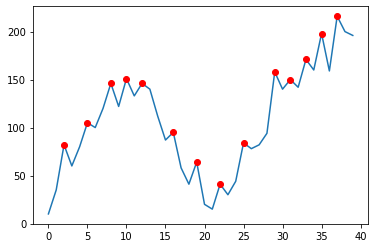

In [9]:
# First of all, one as to read the text file and stores the values in a list (of integers)

# open the file for reading
fd = open("data_ex3.txt","r")

# create an empty list
data = list()

# loop on all the lines of the file and append the line (transformed into an integer) to the list
for l in fd:
    data.append( int(l) )
    
# 1. with the builtin function max, getting the maximum of a list is easy
print(max(data))


# 2. a peak is such that data[i-1]<data[i] and at the same time data[i+1]<data[i]
for i in range(1,len(data)-1):
    if data[i-1]<data[i] and data[i+1]<data[i]:
        print(i,data[i])

# 3. plot everything

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(data)   # for the data, it is easy

# we need to store the values of the peaks if we want to plot it

peak_indexes = list()
peak_values = list()

for i in range(1,len(data)-1):
    if data[i-1]<data[i] and data[i+1]<data[i]:
        peak_indexes.append(i)
        peak_values.append(data[i])


plt.plot(peak_indexes,peak_values,"ro")

# Here, "ro" means that we want to plot red ("r") circles ("o")

plt.show()


*Exercise 4*

The correlation coefficient between two series is given by
$$
r=\frac{\sum_i x_iy_i}{\sqrt{\sum_i x_i^2 \cdot \sum_i y_i^2}}
$$
Write a function that returns the correlation between two series provided as parameters of the function.

Application (file : data_ex4.csv) : in a group of 12 patients, we measure (X) the quantity of lipids in their faeces and (Y) the concentration in acetones in their urine. Is the correlation between X and Y significant ?

In [10]:
# definition of a function

from math import sqrt

def correlation(X,Y):
    sum_XY = 0
    sum_X2 = 0
    sum_Y2 = 0
    for i in range(len(X)):
        sum_XY = sum_XY + X[i]*Y[i]
        sum_X2 = sum_X2 + X[i]*X[i]
        sum_Y2 = sum_Y2 + Y[i]*Y[i]
    return sum_XY/sqrt(sum_X2*sum_Y2)

# Application

fd = open("data_ex4.csv","r")

X = list()
Y = list()
for l in fd:
    T=l.split(";")
    X.append(float(T[0]))
    Y.append(float(T[1]))

print(correlation(X,Y))


0.947866557768097


*Exercise 5*

The Fibonacci series (also known as « the rabbits » series) is defined is $F_0=F_1=1$ and $F_n=F_{n-1}+F_{n-2}, n>1$. Computes the 20 first terms of the Fibonacci series, store them in an array and plot the result. Save the values in outputFibo.txt.

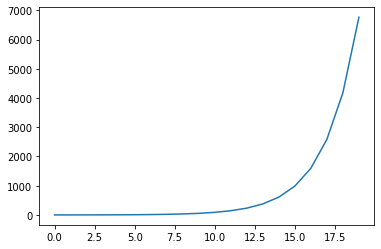

In [11]:
# We directly stores the values
F=[1,1] # it means that F[0]=F[1]=1

for n in range(2,20):
    F.append(F[n-1]+F[n-2])

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(F)   # Notice that it is an exponential series
plt.show()

# Now we will stores the values

fd = open("outputFibo.txt","w")
for v in F:
    fd.write(str(v)+"\n")
fd.close()


Exercise 6

The Lotka-Volterra model permits to reproduce some observed prey-predators phenomenon. More precisely, let $X_n$ denotes the number of preys and $Y_n$ denotes the number of predators. These series evolves as $X_{n+1}= V_x (1+X_n)$ and $Y{n+1}= V_y (1+Y_n)$, with $V_x =  a - b Y_n$ and 
$V_y =  c X_n - d$.

Compute the series $(X_n)$ and $(Y_n)$ for a long period of time and plot the results. What can we conclude ? Test it with $a=0.01$, $b=0.02$, $c=0.03$ and $d=0.04$.

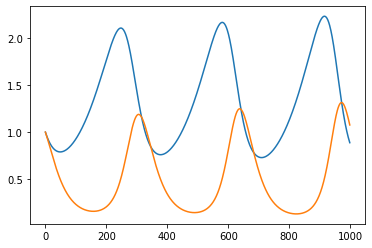

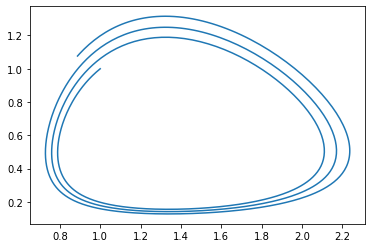

In [12]:
# The Lotka-Volterra model (discrete abstraction)

X=[1]
Y=[1]

a = 0.01
b = 0.02
c = 0.03
d = 0.04

for n in range(1,1000):
    Vx = a - b * Y[n-1] 
    Vy = c * X[n-1] - d 
    X.append(X[n-1] * (1+Vx))
    Y.append(Y[n-1] * (1+Vy))

import matplotlib.pyplot as plt
%matplotlib inline

# Competition between preys and predators
plt.plot(X)
plt.plot(Y)
plt.show()

# "Phase plane"
plt.plot(X,Y)
plt.show()




*Exercise 7*

The GC-content of a DNA string is given by the percentage of symbols in the string that are 'C' or 'G'. For example, the GC-content of "AGCTATAG" is 37.5%. Write a function that computes the GC content of a given DNA sequence. Read the file data_ex7.fasta and print the GC content of all the sequences.

In [13]:
# The most difficult thing consists in reading the fasta file
# each line that begins with ">" contains the name of a gene, they others contains (part of) its sequence
# Out goal is to obtain a list of dictionaries that stores the name, the sequence and the GCcontent of
# each sequence stored in the fasta file

fd= open("data_ex7.fasta","r")

datalist = list()

genename = ""
sequence = ""

for l in fd:
    l=l.replace("\n","")  # Technical line, we need to remove the "\n" (= carriage return) symbols
    if l[0] == ">":
        # we first store the current sequence in the list as a dictionary (only if sequence is not null)
        if not sequence == "":
            datalist.append({"GeneName" : genename, "Sequence": sequence, "GCcontent":0.0})
        genename = l[1:]    # this is a notation for getting subparts of the sequence
        sequence = ""       # we will start a new sequence
    else:
        sequence = sequence + l
        
fd.close()

# notice that at the last gene has not been stored
if not sequence == "":
    datalist.append({"GeneName" : genename, "Sequence": sequence, "GCcontent":0.0})

    
# Computing the GC content is easy by using the "count" function    

for g in datalist:
    s = g.get("Sequence")
    g["GCcontent"] = (s.count("G")+s.count("C"))/len(s) * 100
    
print(datalist)


[{'GeneName': 'HSBGPG Human gene for bone gla protein (BGP)', 'Sequence': 'GGCAGATTCCCCCTAGACCCGCCCGCACCATGGTCAGGCATGCCCCTCCTCATCGCTGGGCACAGCCCAGAGGGTATAAACAGTGCTGGAGGCTGGCGGGGCAGGCCAGCTGAGTCCTGAGCAGCAGCCCAGCGCAGCCACCGAGACACCATGAGAGCCCTCACACTCCTCGCCCTATTGGCCCTGGCCGCACTTTGCATCGCTGGCCAGGCAGGTGAGTGCCCCCACCTCCCCTCAGGCCGCATTGCAGTGGGGGCTGAGAGGAGGAAGCACCATGGCCCACCTCTTCTCACCCCTTTGGCTGGCAGTCCCTTTGCAGTCTAACCACCTTGTTGCAGGCTCAATCCATTTGCCCCAGCTCTGCCCTTGCAGAGGGAGAGGAGGGAAGAGCAAGCTGCCCGAGACGCAGGGGAAGGAGGATGAGGGCCCTGGGGATGAGCTGGGGTGAACCAGGCTCCCTTTCCTTTGCAGGTGCGAAGCCCAGCGGTGCAGAGTCCAGCAAAGGTGCAGGTATGAGGATGGACCTGATGGGTTCCTGGACCCTCCCCTCTCACCCTGGTCCCTCAGTCTCATTCCCCCACTCCTGCCACCTCCTGTCTGGCCATCAGGAAGGCCAGCCTGCTCCCCACCTGATCCTCCCAAACCCAGAGCCACCTGATGCCTGCCCCTCTGCTCCACAGCCTTTGTGTCCAAGCAGGAGGGCAGCGAGGTAGTGAAGAGACCCAGGCGCTACCTGTATCAATGGCTGGGGTGAGAGAAAAGGCAGAGCTGGGCCAAGGCCCTGCCTCTCCGGGATGGTCTGTGGGGGAGCTGCAGCAGGGAGTGGCCTCTCTGGGTTGTGGTGGGGGTACAGGCAGCCTGCCCTGGTGGGCACCCTGGAGCCCCATGTGTAGGGAGAGGAGGGATGGGCATTTTGCACGGGGGC

*Exercise 8*

The distance between two DNA sequences can be measured in several way. The Hamming distance equals the number of positions for which the characters differs.
Write a function DistanceH.

Example: DistanceH(ACTAATGA,ACAATGAC) = 5

Much more difficult. The Levenshtein distance equals the minimal number of insertions, deletions and substitutions that are required to go from one sequence to another. Write a function DistanceL that computes the Levenshtein distance (aka « edit distance ») between two strings. 

Example: DistanceL(ACTAATGA,ACAATGAC) = 2


In [14]:
# Computing the Hamming distance is quite easy

def DistanceH(s1,s2):
    cpt=0
    for i in range(len(s1)):
        if not s1[i] == s2[i]:
            cpt = cpt + 1
    return cpt

print(DistanceH("ACTAATGA","ACAATGAC"))


5


In [15]:
# Computing the Levesthein distance is more tricky. 
# Some explainations can be found here : https://en.wikipedia.org/wiki/Edit_distance

# the basics consists in computing a distance matrix whose element at position i,j contains the edit distance
# between s1[0:i] and s2[0:j]

def DistanceL(s1,s2):
    distMatrix = [[0]*(len(s2)+1) for i in range(len(s1)+1)]     # this strange notation will create a |s1|x|s2| matrix containing zeros
    # first case, distance(s,"")=len(s) (only deletions)
    for i in range(len(s1)+1):
        distMatrix[i][0]=i
    # second case, distance("",s)=len(s) (only insertions)
    for j in range(len(s2)+1):
        distMatrix[0][j]=j

    # third case, distance(s1[0:i],s2[0:j])=distance(s1[0:i-1],s2[0:j-1]) if (s1[i] == s2[j])
    # otherwise, it is the minimum between a substitution, an insertion or a deletion in the appropriate words
    for i in range(len(s1)):
        for j in range(len(s2)):
            if s1[i] == s2[j]:
                distMatrix[i+1][j+1]=distMatrix[i][j]
            else:
                distMatrix[i+1][j+1]=1+min([distMatrix[i][j+1],distMatrix[i][j],distMatrix[i+1][j]])
    # print(distMatrix)
    # The right value is then stored in the last place of the matrix
    return distMatrix[len(s1)][len(s2)]

print(DistanceL("ACTAATGA","ACAATGAC"))


2




*Exercise 9*

A k-mer is a string of length k. We define Count(Text, Pattern) as the number of times that a k-mer Pattern appears as a substring of Text. For example,

Count(ACAACTATGCATACTATCGGGAACTATCCT,ACTAT)=3.
      
We note that Count(CGATATATCCATAG, ATA) is equal to 3 (not 2) since we should account for overlapping occurrences of Pattern in Text. We say that Pattern is a most frequent k-mer in Text if it maximizes Count(Text, Pattern) among all k-mers. For example, "ACTAT" is a most frequent 5-mer in "ACAACTATGCATCACTATCGGGAACTATCCT", and "ATA" is a most frequent 3-mer of "CGATATATCCATAG".

Frequent Words Problem : « Find the most frequent k-mers in a string. »
Given: A DNA string Text and an integer k, it must return: All most frequent k-mers in Text.

Write the Count function and solve the Frequent Words Problem.


In [16]:
# notice that "CGATATATCCATAG".count("ATA") won't work because of the overlaps...

print("CGATATATCCATAG".count("ATA"))

2


In [17]:
# Here is a naive and not efficient method. Finding patterns in strings is a very active field of research.
# Further informations can be found here : https://arxiv.org/abs/1012.2547

def Count(s,p):
    cpt=0
    for i in range(len(s)-len(p)+1):
        if s[i:i+len(p)] == p:
            cpt=cpt+1
    return cpt

print(Count("CGATATATCCATAG","ATA"))

3


In [18]:
s = "ACAACTATGCATCACTATCGGGAACTATCCT"
k = 5

max_word=s[0:k]
max_count=Count(s,max_word)

for i in range(1,len(s)-k+1):
    w = s[i:i+k]
    c = Count(s,w)
    if c>max_count:
        max_count = c
        max_word = w
        
print(max_word,max_count)


ACTAT 3


# Useful sample codes

In [ ]:
# inputs/outputs

s = input("Enter a string ")

n = int(input("Enter an integer "))

x = float(input("Enter a real value "))


print(s,n,x)

In [ ]:
# defining a new function

def myfunction(x,y):
    res = x+x*y
    return res

print(myfunction(2,5))

In [ ]:
# conditional statement

n = int(input("Enter your age "))
if n>18:
    print("You are an adult")
else:
    print("You are minor")

In [ ]:
# while loop

lump_size = 100
number_of_minutes = 0
while lump_size>1:
    lump_size = lump_size / 2     # mix the cake
    number_of_minutes = number_of_minutes + 1

print("Mix the cake for",number_of_minutes,"minutes")

In [ ]:
# for loop

for i in range(10):
    print(i*(i+1)/2)

In [ ]:
# for loop of strings

s = "Hello Bioinformaticians"

for c in s:
    print(c)

In [ ]:
# lists/arrays

# method 1
L1 = [1,5,3,4]
print(L1)

# method 2
L2 = list()
for i in range(5):
    v = int(input("Enter value no"+str(i)))
    L2.append(v)
print(L2)
    
# method 3
L3 = [i*i for i in range(10) if i % 2 == 1]
print(L3)

# for loop on lists
cpt = 0
for v in L3:
    cpt=cpt+v
print(cpt)

# notice that sum does the same but you do not have an appropriate function for everything
print(sum(L3))


In [ ]:
# maths.... and how we can import libraries

# method 1

import math

print(math.sqrt(2))


In [ ]:
# method 2 (now, m is a short cut for math)

import math as m
print(m.sin(5))

In [ ]:
# method 3 (now sin and sqrt are known in the current context)

from math import sin, sqrt

print(sqrt(2), sin(5))

In [ ]:
# but not "cos"....

print(cos(5))

In [ ]:
# drawings
from math import sqrt
L = [sqrt(i) for i in range(100)]

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(L)
plt.show()